In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Stage 2: David

Generate weekly statistics for a single state.

<Axes: >

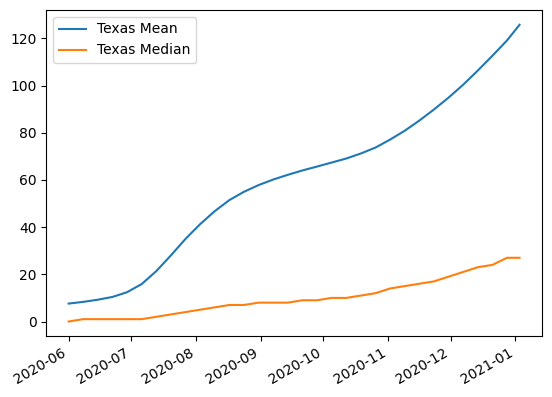

In [58]:
# This is mostly a copy paste of the code Derik and I contributed to the main project.
super_covid = pd.read_csv('./data/super_covid_data.csv')
covid_cases = pd.read_csv('./data/covid_confirmed_usafacts.csv')
covid_deaths = pd.read_csv('./data/covid_deaths_usafacts.csv')

# It will be easier to handle these separately so I'm importing the deaths and cases CSVs again.

# Create a dataframe I actually want to manipulate
cd_date = covid_deaths.drop(covid_deaths.columns[[0, 1, 2, 3]], axis=1, inplace=False)

#Transpose
cd_date = cd_date.transpose()

# Change the index to a date and time so that I can resample it.
cd_date.index = pd.to_datetime(cd_date.index)

#Repeat this process for Cases
cc_date = covid_cases.drop(covid_cases.columns[[0, 1, 2, 3]], axis=1, inplace=False)
cc_date = cc_date.transpose()
cc_date.index = pd.to_datetime(cc_date.index)

start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')

cd_date = cd_date.T
cd_date = cd_date[[col for col in cd_date.columns if start_date <= col <= end_date]]

cc_date = cc_date.T
cc_date = cc_date[[col for col in cc_date.columns if start_date <= col <= end_date]]

cd_last_date = cd_date.iloc[:, -1:]
cd_date = cd_date.loc[:, ::7]
cd_date = pd.concat([cd_date, cd_last_date], axis=1)

cc_last_date = cc_date.iloc[:, -1:]
cc_date = cc_date.loc[:, ::7]
cc_date = pd.concat([cc_date, cc_last_date], axis=1)

# Put my Dataframes back together
covid_deaths.drop(columns=covid_deaths.columns[4:], inplace=True)
covid_deaths = pd.concat([covid_deaths, cd_date], axis=1)

covid_cases.drop(columns=covid_cases.columns[4:], inplace=True)
covid_cases = pd.concat([covid_cases, cc_date], axis=1) 

# Grab the data for Texas
texas_cases = covid_cases[covid_cases['State'] == 'TX']
texas_deaths = covid_deaths[covid_deaths['State'] == 'TX']

#Get the average and median data for texas as a whole.
texas_d = texas_deaths.drop(texas_deaths.columns[0:4], axis=1, inplace=False)

# Condense down to Texas data overall per date.
texas_d_mean = texas_d.mean()

texas_d_med = texas_d.median()

texas_graph = pd.concat([texas_d_mean,texas_d_med], axis=1)

texas_df = pd.DataFrame({'Texas Mean':texas_d_mean, 'Texas Median': texas_d_med})

texas_df.plot()

Compare Data against 5 other states.